In [343]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [344]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']  

In [345]:
df['ОПИСАНИЕ'][1]

'целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было)'

In [346]:
# считаем все-все данные

In [347]:
train = pd.read_csv('02_otp_train.csv', sep=';') # файл с обучающей выборкой

In [348]:
# отделим таргет от TRAIN-а

In [349]:
y = train['TARGET'] 

In [350]:
# соеденим train и test


In [351]:
train = train.drop('TARGET', axis=1)

In [352]:
#all_data = pd.concat([train, test]) 

In [353]:
# посмотрим типы данных и их заполняемость

In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 51 columns):
AGREEMENT_RK                  15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PROVINCE          15223 non-null object
FACT_ADDRESS_P

In [355]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [356]:
for i in train.columns: # перебираем все столбцы
    if str(train[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку


 
        

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее специальное', 'Ученая степень', 'Высшее', 'Среднее'}

MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Сельское хозяйство', 'Строительство', 'Другие сферы', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Сборочные производства', 'Банк/Финансы', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Страхование', 'Подбор персонала', 'Транспорт', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Наука', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Салоны красоты и здоровья', 'Туризм', 'Информационные услуги', 'Управляющая компания', 'Развлечения/Искусство', 'Недвижимость', 'Государственная служба', 'Маркетинг'}

GEN_TITLE
{na

In [357]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [358]:
# причина же что использовалась запятая для разделения не целой части числа

In [359]:

def toFloat(df,cols):
    for col in cols: 
        df[col] = df[col].map(lambda x: x.replace(',', '.')).astype('float')

def toStabilizationData(df):
    toFloat(df,[
    'CREDIT',
    'LOAN_AVG_DLQ_AMT',
    'FST_PAYMENT',
    'PERSONAL_INCOME',
    'LOAN_MAX_DLQ_AMT'
    ]) 
    
    df = df.drop(['PREVIOUS_CARD_NUM_UTILIZED','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE'], axis=1)

    df = pd.get_dummies(df, columns=[
        'EDUCATION',
        'MARITAL_STATUS',
        'GEN_INDUSTRY',
        'GEN_TITLE',
        'ORG_TP_STATE',
        'ORG_TP_FCAPITAL',
        'JOB_DIR',
        'FAMILY_INCOME', 
        'TP_PROVINCE','REGION_NM'  
    ])
  
    df.WORK_TIME[df.WORK_TIME.isnull()] = df.WORK_TIME.mean() 
    
    return df

train = toStabilizationData(train)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [360]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [361]:
for i in train.columns:
    if str(train[i].dtype) == 'object':
        print(i)
        print(set(train[i]))
        print()

In [362]:
for i in train.columns:
    null_len = len(train[train[i].isnull()])
    if(null_len>0):
        print(null_len,i) 

# Данные готовы, теперь вам предлагается начать решать задачу

In [363]:
# Как поступить со строковыми переменными?
 


In [364]:
# В итоге должны получиться данные без пропусков и только числовые

train.info()
 
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Columns: 195 entries, AGREEMENT_RK to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(31), uint8(158)
memory usage: 6.6 MB


Index(['AGREEMENT_RK', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'REG_FACT_FL',
       'FACT_POST_FL',
       ...
       'REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ', 'REGION_NM_ЗАПАДНО-СИБИРСКИЙ',
       'REGION_NM_ПОВОЛЖСКИЙ', 'REGION_NM_ПРИВОЛЖСКИЙ',
       'REGION_NM_СЕВЕРО-ЗАПАДНЫЙ', 'REGION_NM_УРАЛЬСКИЙ',
       'REGION_NM_ЦЕНТРАЛЬНЫЙ 1', 'REGION_NM_ЦЕНТРАЛЬНЫЙ 2',
       'REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС', 'REGION_NM_ЮЖНЫЙ'],
      dtype='object', length=195)

In [365]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)


In [366]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba
  
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


class Clasifiers:
    
    clasifiers = {}
    
    def set(self,key,obj):
        self.clasifiers[key] = obj
    
    def get(self,key):
        return self.clasifiers[key]
    

clasifiers = Clasifiers()    
    
predict = {}

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
clasifiers.set('DecisionTreeClassifier',dtc)
predict['DecisionTreeClassifier'] = {
    'predict':dtc.predict(X_test),
    'proba': dtc.predict_proba(X_test)
}

dtc = RandomForestClassifier()
dtc.fit(X_train, y_train)
clasifiers.set('RandomForestClassifier',dtc)
predict['RandomForestClassifier'] = {
    'predict':dtc.predict(X_test),
    'proba': dtc.predict_proba(X_test)
}

dtc = LogisticRegression()
dtc.fit(X_train, y_train)
clasifiers.set('LogisticRegression',dtc)
predict['LogisticRegression'] = {
    'predict':dtc.predict(X_test),
    'proba': dtc.predict_proba(X_test)
} 

In [367]:
# Посчитать метрики стандартные
# accuracy, precision, recall

predict_analize = {}
for _ , clasif in enumerate(predict):
    print(clasif) 
    print('precision', precision_score(y_test, predict[clasif]['predict']))
    print('recall', recall_score(y_test, predict[clasif]['predict']))
    print('accuracy', accuracy_score(y_test, predict[clasif]['predict']))
    print('\n--------------------------------------------------------\n')
    
    predict_analize[clasif] = { 
        'precision':precision_score(y_test, predict[clasif]['predict']),
        'recall':recall_score(y_test, predict[clasif]['predict']),
        'accuracy':accuracy_score(y_test, predict[clasif]['predict'])
    }


RandomForestClassifier
precision 0.333333333333
recall 0.0126126126126
accuracy 0.876943288811

--------------------------------------------------------

DecisionTreeClassifier
precision 0.143344709898
recall 0.151351351351
accuracy 0.786949857675

--------------------------------------------------------

LogisticRegression
precision 0.0
recall 0.0
accuracy 0.878476023648

--------------------------------------------------------



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [368]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
import pandas as pd
from matplotlib import pyplot as plt
import pylab as P
  
   
x_data = []
for _ , clasif in enumerate(predict_analize):  
     x_data.append([
        clasif,
        predict_analize[clasif]['recall'],
        predict_analize[clasif]['precision'],
        predict_analize[clasif]['accuracy'],
    ])
      
res_df = pd.DataFrame(x_data, columns=['clasif','recall','precision','accuracy']) 


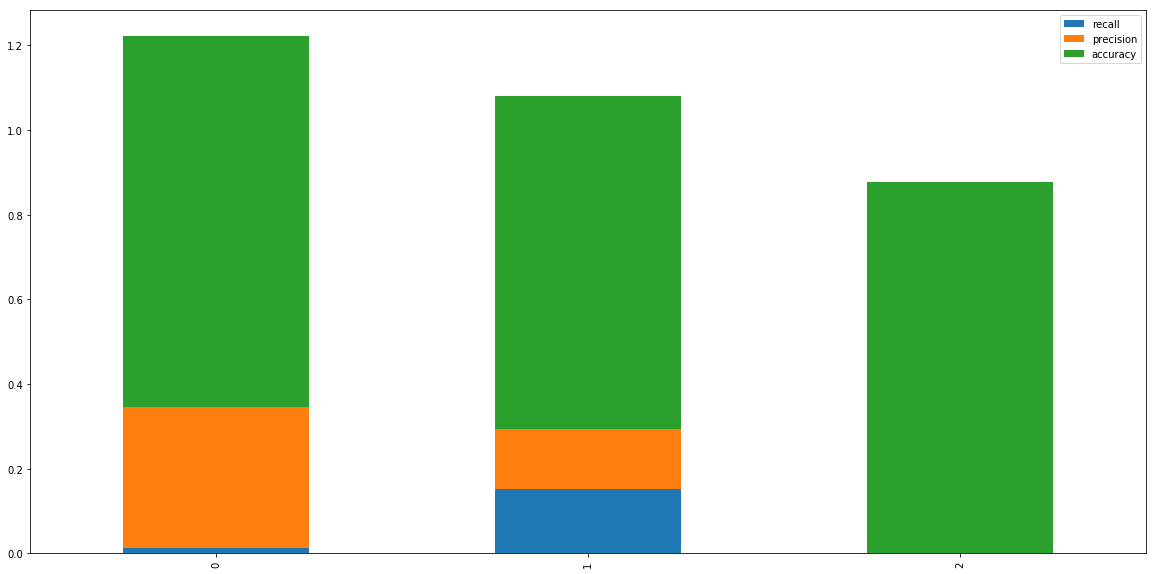

In [369]:

 
plt.figure();
fig, ax = plt.subplots(figsize=(20,10))
res_df.plot(kind='bar', stacked=True, ax=ax )


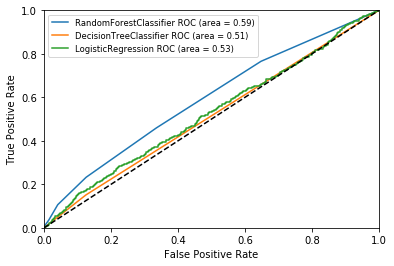

,0
0,RandomForestClassifier ROC (area = 0.59)
1,DecisionTreeClassifier ROC (area = 0.51)
2,LogisticRegression ROC (area = 0.53)


In [370]:
# Построить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import auc, roc_curve

roc_list = []
for _ , clasif in enumerate(predict):
     fpr, tpr, thresholds = roc_curve(y_test, predict[clasif]['proba'][:,1])
     roc_auc = auc(fpr, tpr)
     label = '%s ROC (area = %0.2f)' % (clasif,roc_auc)
     roc_list.append(label)
     plt.plot(fpr, tpr, label=label)
    
     
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show() 

rocDf = pd.DataFrame(roc_list)
rocDf
    

In [371]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc 


cross_val_df = pd.DataFrame(columns=['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'])
 
 
rfc = DecisionTreeClassifier()
cross_val_df['DecisionTreeClassifier'] = cross_val_score(
    rfc,
    train,
    y,
    scoring='roc_auc',
    cv=10
) 

rfc = RandomForestClassifier()
cross_val_df['RandomForestClassifier'] = cross_val_score(
    rfc,
    train,
    y,
    scoring='roc_auc',
    cv=10
) 

 
rfc = LogisticRegression()
cross_val_df['LogisticRegression'] = cross_val_score(
    rfc,
    train,
    y,
    scoring='roc_auc',
    cv=10
)


for col in cross_val_df.columns:
    print("{0}: {1}".format(col,cross_val_df[col].mean()))


DecisionTreeClassifier: 0.5204695264218372
RandomForestClassifier: 0.5798383718964741
LogisticRegression: 0.5154254735675025


In [372]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
test_df = pd.read_csv("02_otp_test.csv", sep=';')
test = toStabilizationData(test_df)

proba = clasifiers.get('RandomForestClassifier').predict_proba(test)

pd.DataFrame(proba)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1
0,0.9,0.1
1,0.9,0.1
2,0.9,0.1
3,0.9,0.1
4,0.9,0.1
5,0.9,0.1
6,0.9,0.1
7,0.9,0.1
8,0.8,0.2
9,0.7,0.3
